## Exceptional Work

Our Attempt At GPU Computing

We found a project called H2O4GPU by H2O AI https://github.com/h2oai/h2o4gpu#installation which is a collection of GPU solvers with APIs for Python:  

"The Python API builds upon the easy-to-use scikit-learn API and its well-tested CPU-based algorithms. It can be used as a drop-in replacement for scikit-learn (i.e. import h2o4gpu as sklearn) with support for GPUs on selected (and ever-growing) algorithms. H2O4GPU inherits all the existing scikit-learn algorithms and falls back to CPU algorithms when the GPU algorithm does not support an important existing scikit-learn class option."  

We have access to an Nvidia Geforce RTX 2080.  
We installed:  
- Ubuntu 18.04LTS  
- NVidia Drivers for Ubuntu  
- NVidia Cuda Kit
- H2O4GPU  
- Many other small things  

We were able to run the following test which indicates that the enivironment is doing something:

In [1]:
import h2o4gpu
import numpy as np

X = np.array([[1.,1.], [1.,4.], [1.,0.]])
model = h2o4gpu.KMeans(n_clusters=2,random_state=1234).fit(X)
model.cluster_centers_

array([[1. , 0.5],
       [1. , 4. ]])

However our attempts to make our models (SVM's in particular) function resulted in crashing kernels.  

The libraries are designed for  
-Ubuntu 16.04  
-Python 3.6  
-Cuda 9.2  

Our RTX2080 GPU is the very latest technology (as of the time of this writing) from NVIdia. It's driver version is only compatible with Cuda 10.0 which conflicts with H2O4GPU's 9.2 requirement. Also in hindsight we should have been running Ubuntu 16.04 rather than 18.04.

There is a PCA example provided by H2O which apparently is functional in this simple case (see below) however again when we adapted our PCA our Kernel crashed.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

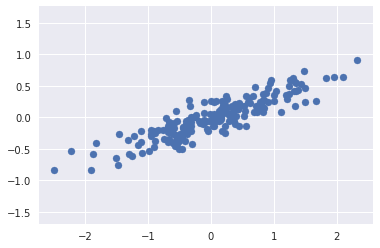

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [4]:
from h2o4gpu.solvers.pca import PCAH2O
pca = PCAH2O(n_components=2)
pca.fit(X)

In [5]:
print(pca.components_)

[[-0.94446027 -0.32862556]
 [-0.32862556  0.94446027]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


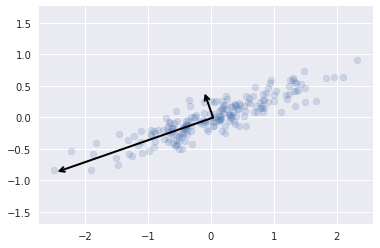

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [8]:
pca = PCAH2O(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


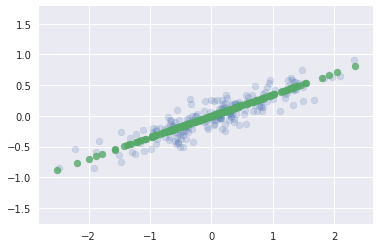

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

### Conclusion  

H2O4GPU can function for some use cases with the right hardware and software environment. However it still needs development before we can rely on it unless we enhance our C++ programming skills.